In [11]:
from environment.TheoreticalMarket import *
import numpy as np



In [12]:
ref_prices = np.linspace(0.01, 10, 50)

# Config 1
# beta0 = 27
# beta1 = -1.1
# beta2 = -1.0
# a = 0.1

# Config 2
beta0 = 25
beta1 = -0.6
beta2 = -6.1
a = 0.1

# Config 3
# beta0 = 15
# beta1 = -1.05
# beta2 = -3.1
# a = 0.1

# Config 4
# beta0 = 13
# beta1 = -5.05
# beta2 = -2.1
# a = 0.2


# Config 5
# beta0 = 27
# beta1 = -3.05
# beta2 = -1.1
# a = 0.2
tm = TheoreticalMarket(beta0 = beta0, beta1 = beta1, beta2 = beta2, a = a, ref_p = 1.5)


prices = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[0] for r in ref_prices])
devs = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[1] for r in ref_prices])
demand = np.array([get_nash_eps_curve(r, beta0, beta1, beta2, a)[2] for r in ref_prices])

/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:43: RuntimeWarning: divide by zero encountered in double_scalars
  return (self.gamma / self.demand_func(x)) - (1 / x)
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:46: RuntimeWarning: divide by zero encountered in double_scalars
  return self.gamma / (self.demand_func(x) * x )
/home/larkin/code/dqn-marl/environment/TheoreticalMarket.py:51: RuntimeWarning: invalid value encountered in double_scalars
  square_term = np.max([0, np.power(c1, 2) - c1 + 4*(c2 -1)*c2 - 2*c2])


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 

y = ref_prices
x = prices[0]
X, Y = np.meshgrid(x, y) 
z = devs

In [14]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, devs, 999, cmap='viridis')
# ax.set_xlabel('Market Price')
# ax.set_ylabel('Reference Price')
# ax.set_zlabel('Epsilon Deviation')

Text(0.5, 0.92, 'Epsilon Deviation w.r.t. Market & Reference Price')

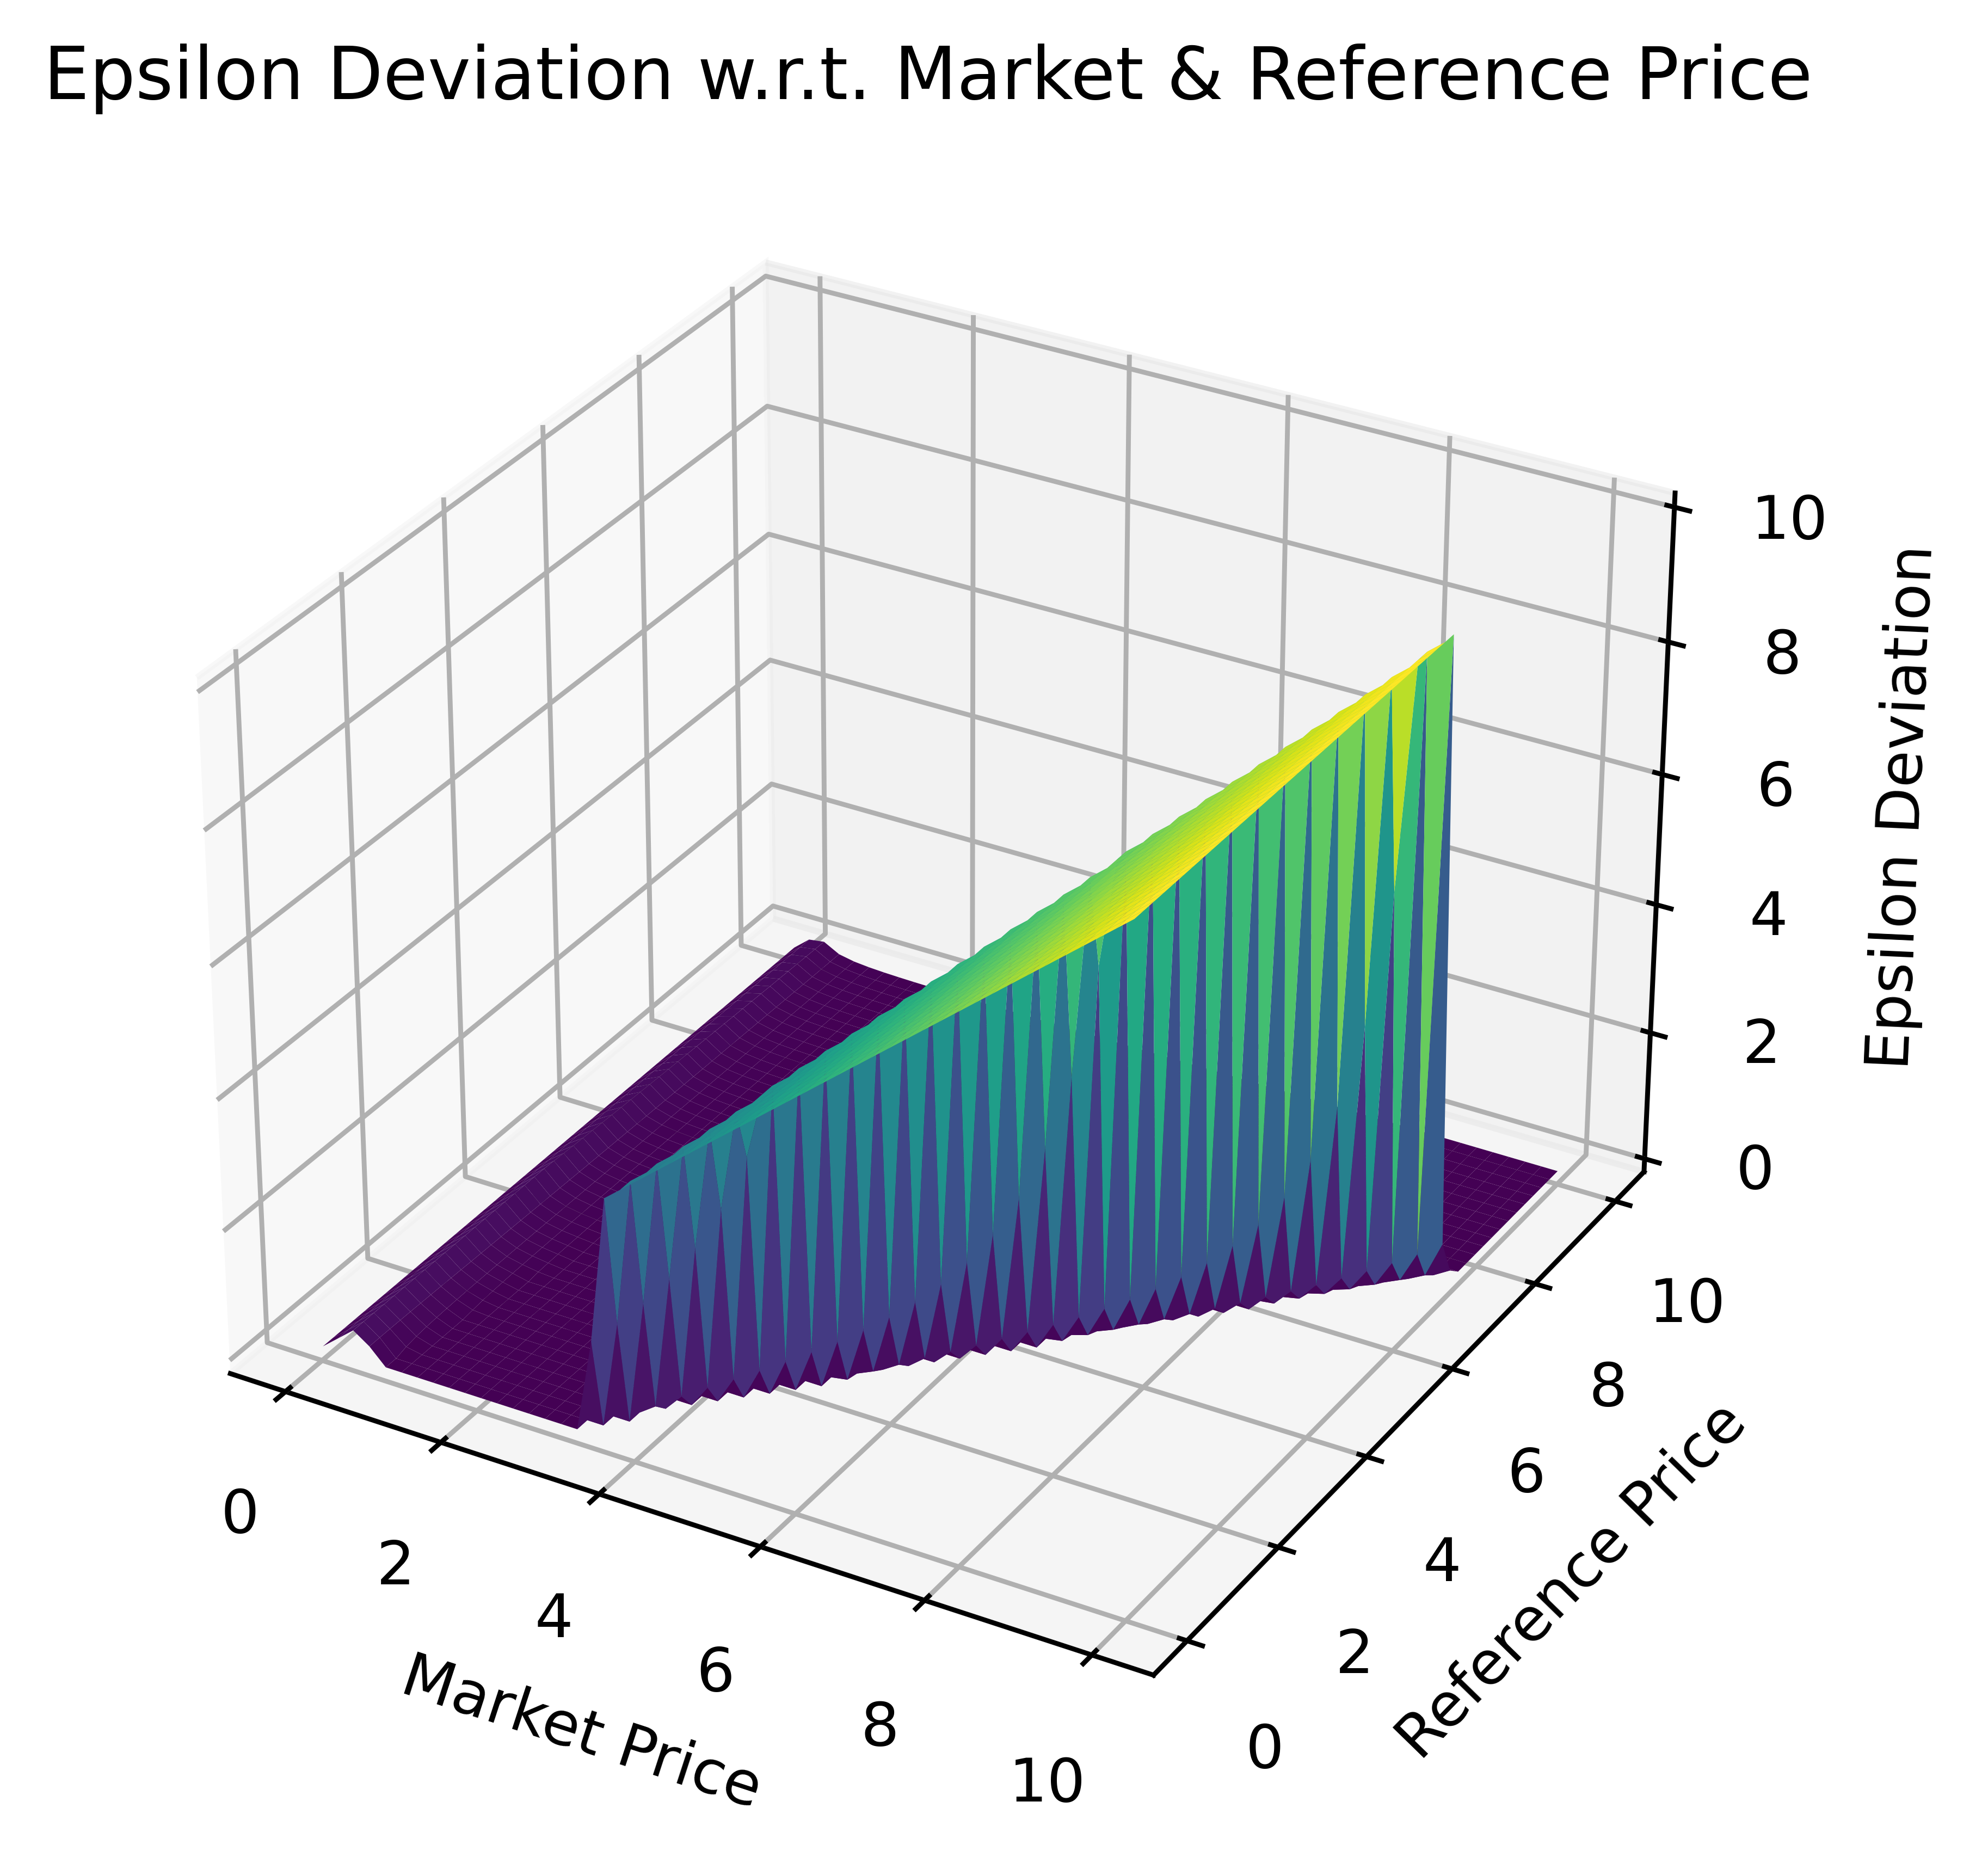

In [15]:
fig = plt.figure(figsize = (7, 5), dpi = 800)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, devs, cmap='viridis', edgecolor='none')
ax.set_xlabel('Market Price')
ax.set_ylabel('Reference Price')
ax.set_zlabel('Epsilon Deviation')
ax.set_title('Epsilon Deviation w.r.t. Market & Reference Price')

Text(0.5, 0.92, 'Epsilon Deviation w.r.t. Market & Reference Price')

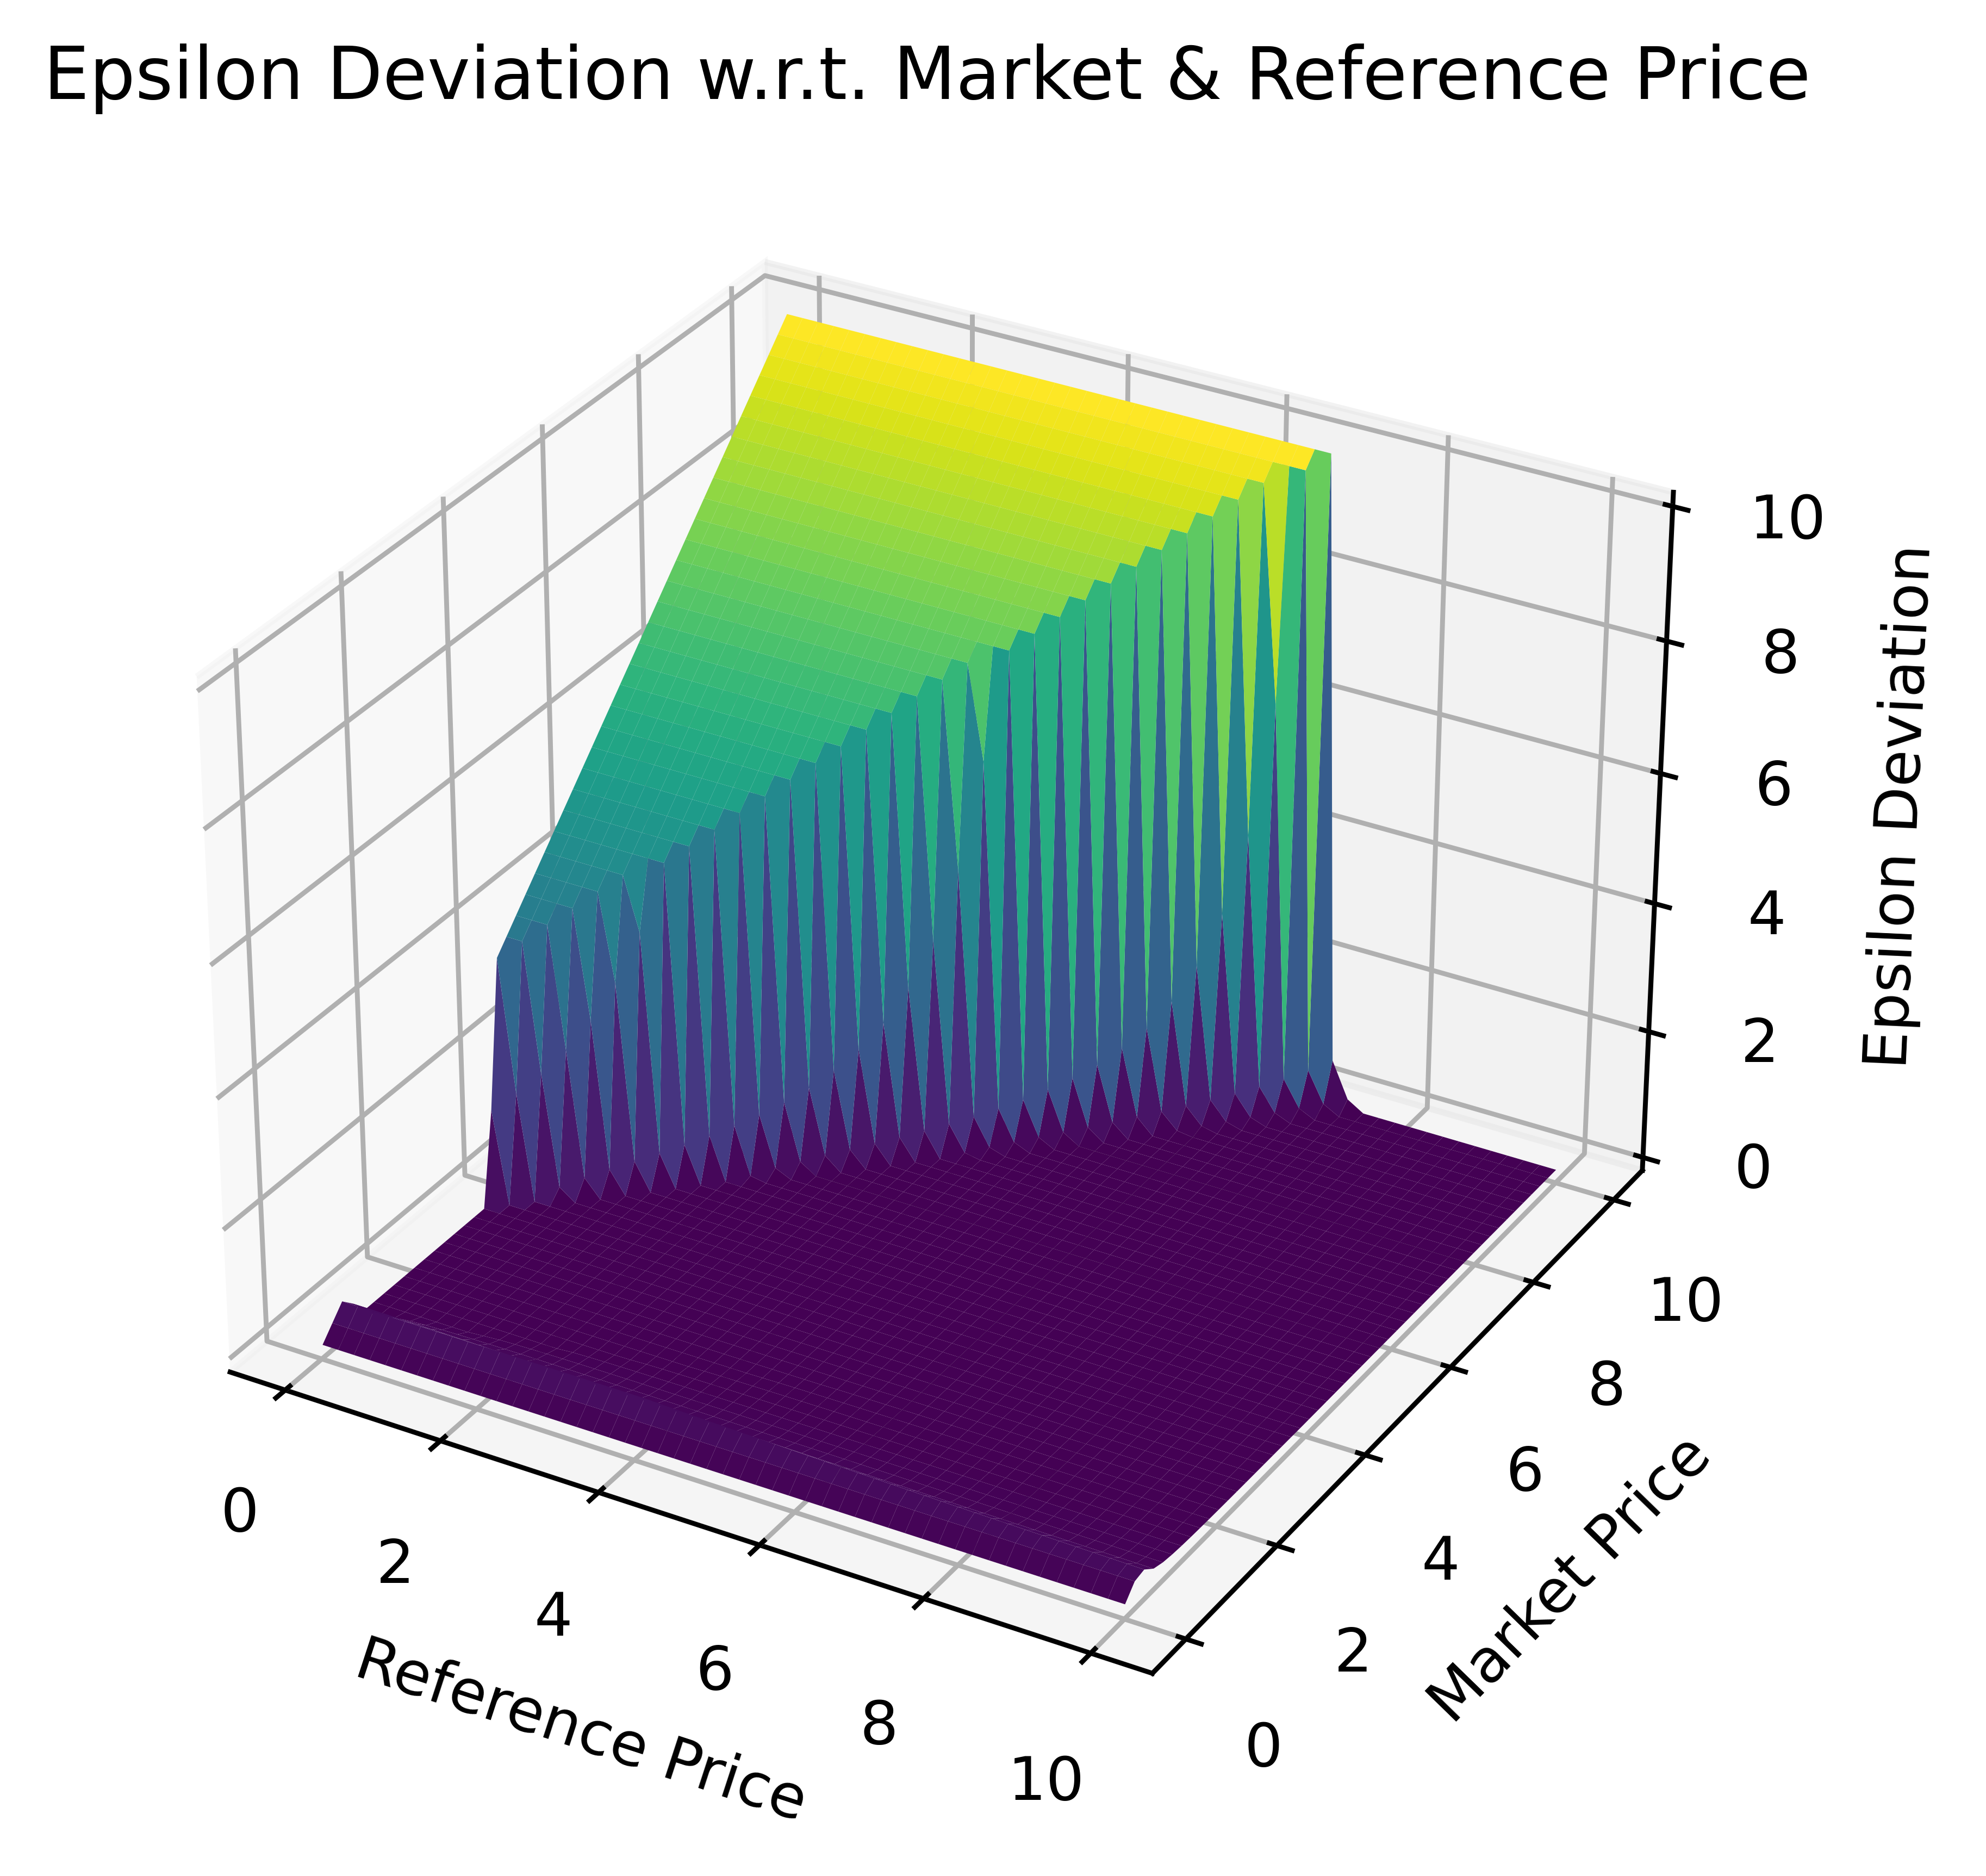

In [16]:
fig = plt.figure(figsize = (7, 5), dpi = 800)
ax = plt.axes(projection='3d')
ax.plot_surface(Y, X, devs, cmap='viridis', edgecolor='none')
ax.set_xlabel('Reference Price')
ax.set_ylabel('Market Price')
ax.set_zlabel('Epsilon Deviation')
ax.set_title('Epsilon Deviation w.r.t. Market & Reference Price')

In [17]:
# Get epsilon range
# X market price
# Y ref price, all same
# z eps
# Y[44]

min_eps_price, max_eps_price = get_eps0_range(9.9, Y, X, z)
min_eps_price, max_eps_price

(3.883673469387755, 10.0)

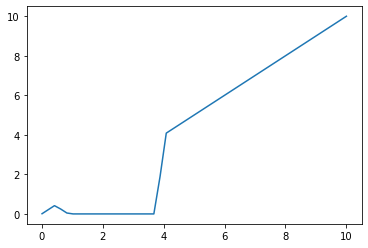

In [18]:
market_prices, nash_eps_curve, _ = get_eps_curves(0.5, Y, X, z)
plt.plot(market_prices, nash_eps_curve)

In [19]:
dev_price_list = []
dev_price_arr = np.array([devs, prices])
for i in range(dev_price_arr.shape[1]):
    dev_price_list.append(dev_price_arr[:,i])

In [20]:
-(tm.beta0 - tm.beta2*tm.ref_p) / (tm.beta1 + tm.beta2)

5.097014925373134

In [21]:
tm.demand_func(8.701)

0.0

In [22]:
(tm.beta2 * tm.ref_p - tm.beta0)/ (2*(tm.beta1 + tm.beta2)) 

2.548507462686567

In [23]:
tm.demand_func(8.75)

0.0

In [24]:
# tm.compute_opt_dev(8.21)

tm.demand_func(5) / tm.gamma

0.09701492537313412

In [25]:
tm.compute_profit(0.01, np.array([0.01, 0.02, 0.02]))

0.00906699467552109

In [26]:
tm.get_c2(0.01)

19.65789396473315

In [27]:
tm.demand_func(0.01)

34.083